In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
df= pd.read_csv('customer .csv', sep= ',' , encoding= ' utf-8')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
fill = {'SeniorCitizen':1 , 'tenure':df['tenure'].mean()}
fill

{'SeniorCitizen': 1, 'tenure': 33.04147331786543}

In [7]:
df['SeniorCitizen'].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [8]:
 df.fillna(fill , inplace=True)
 

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','StreamingMovies','MonthlyCharges',
           'TotalCharges', 'Churn']

In [11]:
df = df[columns]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,Female,1.0,Yes,No,33.041473,No,29.85,29.85,No
1,Male,1.0,No,No,34.000000,No,56.95,1889.50,No
2,Male,1.0,No,No,2.000000,No,53.85,108.15,Yes
3,Male,1.0,No,No,45.000000,No,42.30,1840.75,No
4,Female,1.0,No,No,2.000000,No,70.70,151.65,Yes


In [12]:
from sklearn.preprocessing import LabelEncoder


In [13]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [14]:
gender_le = LabelEncoder()
churn_le = LabelEncoder()
Streaming_le = LabelEncoder ()


In [15]:
df['Dependents'] = churn_le.fit_transform(df['Dependents'])

In [16]:
df['Partner'] = churn_le.fit_transform(df['Partner'])

In [17]:
df['gender'] = gender_le.fit_transform(df['gender'])

In [18]:
df['Churn'] = churn_le.fit_transform(df['Churn'])


In [19]:
df['StreamingMovies'] = Streaming_le.fit_transform (df['StreamingMovies'])

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,33.041473,0,29.85,29.85,0
1,1,1.0,0,0,34.000000,0,56.95,1889.50,0
2,1,1.0,0,0,2.000000,0,53.85,108.15,1
3,1,1.0,0,0,45.000000,0,42.30,1840.75,0
4,0,1.0,0,0,2.000000,0,70.70,151.65,1


In [21]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001622,-0.001808,0.010517,0.010031,-0.008743,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001622,1.000000,0.014132,-0.206323,0.013337,0.042850,0.217894,0.101257,0.150035
Partner,-0.001808,0.014132,1.000000,0.452676,0.370704,0.129574,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.206323,0.452676,1.000000,0.158957,0.021321,-0.113890,0.064535,-0.164221
tenure,0.010031,0.013337,0.370704,0.158957,1.000000,0.289200,0.236084,0.814245,-0.341083
StreamingMovies,-0.008743,0.042850,0.129574,0.021321,0.289200,1.000000,0.335459,0.397909,-0.038492
MonthlyCharges,-0.014569,0.217894,0.096848,-0.113890,0.236084,0.335459,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.101257,0.318812,0.064535,0.814245,0.397909,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150035,-0.150448,-0.164221,-0.341083,-0.038492,0.193356,-0.199428,1.000000


In [22]:
ten_min = df['tenure'].min()
ten_max = df['tenure'].max()
df['tenure'] = (df['tenure']-ten_min)/(ten_max-ten_min)

In [23]:
tot_min = df['TotalCharges'].min()
tot_max = df['TotalCharges'].max()
df['TotalCharges'] = (df['TotalCharges']-tot_min)/(tot_max-ten_min)

In [24]:
mn_min = df['MonthlyCharges'].min()
mn_max = df['MonthlyCharges'].max()
df['MonthlyCharges'] = (df['MonthlyCharges']-mn_min)/(mn_max-ten_min)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,0.451288,0,0.098514,0.001272,0
1,1,1.0,0,0,0.464789,0,0.328662,0.215424,0
2,1,1.0,0,0,0.014085,0,0.302335,0.010289,1
3,1,1.0,0,0,0.619718,0,0.204246,0.209810,0
4,0,1.0,0,0,0.014085,0,0.445435,0.015299,1


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Churn' , axis= 1).values 
Y = df['Churn'].values

In [28]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size= 0.20, random_state =30)

In [29]:
x_train.shape

(5634, 8)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(max_depth=2 , max_features= 3)

In [32]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2, max_features=3)

In [33]:
dt.score(x_train , y_train)

0.7882499112531062

In [34]:
dt.score(x_test , y_test)

0.7686302342086586

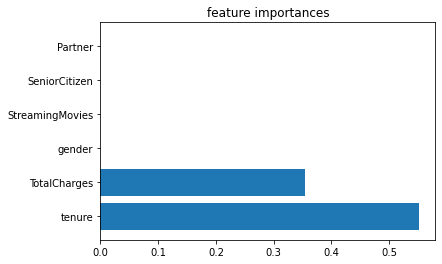

In [35]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'StreamingMovies', 'TotalCharges']


# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=6)


[Text(0.5, 0.8333333333333334, 'X[4] <= 0.204\ngini = 0.384\nsamples = 5634\nvalue = [4173, 1461]'),
 Text(0.25, 0.5, 'X[6] <= 0.428\ngini = 0.495\nsamples = 1864\nvalue = [1028, 836]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.404\nsamples = 1025\nvalue = [737, 288]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.453\nsamples = 839\nvalue = [291, 548]'),
 Text(0.75, 0.5, 'X[7] <= 0.019\ngini = 0.277\nsamples = 3770\nvalue = [3145, 625]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.495\nsamples = 111\nvalue = [50, 61]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.261\nsamples = 3659\nvalue = [3095, 564]')]

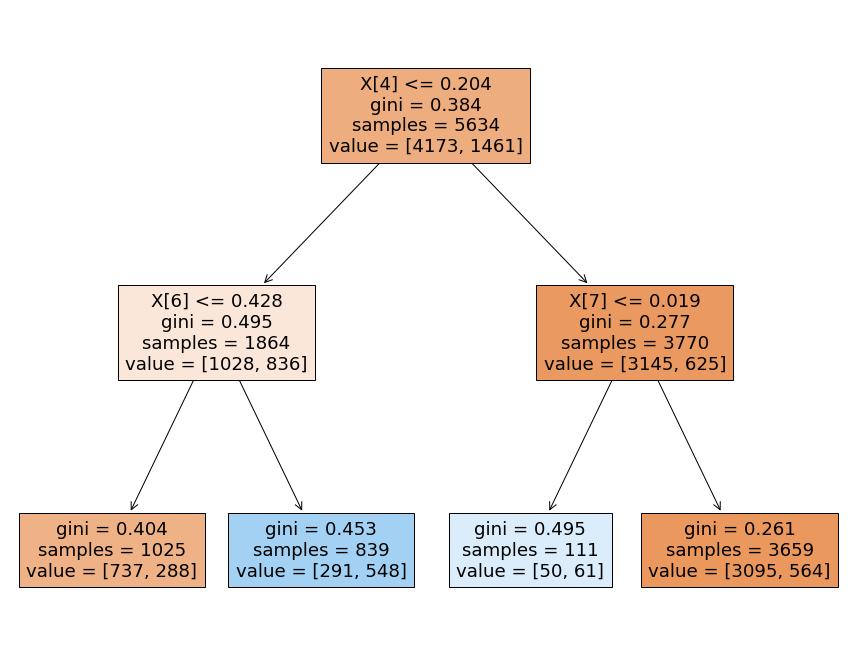

In [36]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf =RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=3)

In [39]:
rf.score(x_train,y_train)

0.8083067092651757

In [40]:
rf.score(x_test,y_test)

0.765791341376863

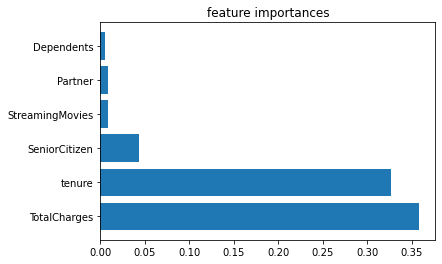

In [41]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'StreamingMovies', 'TotalCharges']


# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=6)


In [43]:
new_user = [0,0.0,0,0,33.0,0,29.85,151.65]

In [45]:
dt.predict([new_user])

array([0])

In [46]:
dt.predict_proba([new_user])

array([[0.84585952, 0.15414048]])

## XGBOOST

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [88]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [89]:
xgb.score(x_train , y_train)

0.8514376996805112

In [90]:
xgb.score(x_test , y_test)

0.7665010645848119

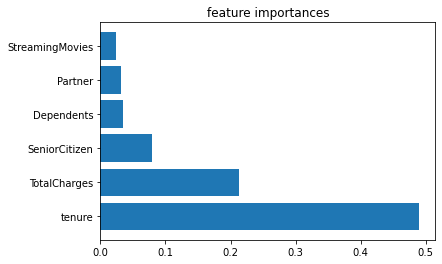

In [80]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'StreamingMovies', 'TotalCharges']


# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(xgb.feature_importances_), features_names, top=6)


# adaboost|

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
ada = AdaBoostClassifier(n_estimators=5, learning_rate=0.2)

In [83]:
ada.fit(x_train , y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=5)

In [84]:
ada.score(x_train , y_train )

0.740681576144835

In [85]:
ada.score(x_test , y_test)

0.7104329311568488

## Voting

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [93]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)


In [95]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "hard")

In [96]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=4)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma...
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=No

In [97]:
v_clf.score(x_train , y_train)

0.8139865104721334

In [98]:
v_clf.score(x_test , y_test)

0.7679205110007097